<a href="https://colab.research.google.com/github/PHYS486-S22/PHYS486-S22/blob/main/SampleNotebooks/Euler_Projectile_wDrag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This cell below is a handy little markdown cell that renders as a badge, and opens the notebook directly in Google Colab. Clever!

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PHYS486-S22/PHYS486-S22/blob/main/SampleNotebooks/Euler_Projectile.ipynb)

In [4]:
#import packages that we'll use often; 
#use conventional names (i.e., numpy as np, etc.).
import numpy as np
import math

#import matplotlib packages we'll use frequently;
#again use conventional names (pyplot as plt, colorbar as cb, etc.)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.colorbar as cb

#tell the notebook we want a copy of the figure inline
%matplotlib inline

#set preferences to make our plots cleaner / more legible
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.linewidth'] = 2
#plt.rcParams['axes.tickwidth'] = 8

plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

new text here

### Analytic Solution

Since Physics 161, we've been solving 1-D motion problems with the analytic solution:

$v(t) = v_0 - g t$

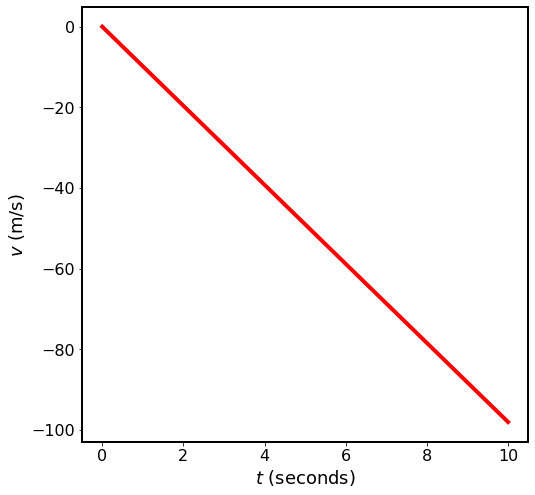

In [ ]:
#now see if this solution looks correct
time = np.linspace(0, 10, 100)  #what does this command do? 
v_0 = 0.
g = 9.8
velocity = v_0 - g*time
plt.plot(time[:],velocity[:],linewidth = 4, color = 'r')
#plt.axis([1E-3,1.5,1E-2,2.5E3])
xlabel = plt.xlabel('$t$ (seconds)') 
ylabel = plt.ylabel('$v$ (m/s)')

### Numerical Solution via Eulerian Method
Now do the same problem numerically. First, define a function that computes the new velocity at a given time by iterating from the prior timestep.

In [11]:
def update_velocity(v_now, g, timestep):
    dv_dt = -g + 0.004*v_now**2
    v_next = v_now+dv_dt*timestep
    return v_next

And now define a function that takes in an initial velocity, a total model duration and the timestep and generates a range of velocities:

In [12]:
def model_velocities(v_initial, grav, model_time, time_step_size):
    n_steps = math.ceil(model_time / time_step_size)+1 #add one because n steps require n+1 datapoints
    times = np.zeros(n_steps)
    velocities = np.zeros(n_steps)
    velocities[0] = v_initial
    
    for x in range(0,n_steps-1):
        times[x+1] = times[x]+time_step_size
        velocities[x+1] = update_velocity(velocities[x], grav, time_step_size)
    return times, velocities

And use the Eulerian model to compare to the exact solution when $\gamma$ = 0:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f8376cd4850> has a label of '_line0' which cannot be automatically added to the legend.


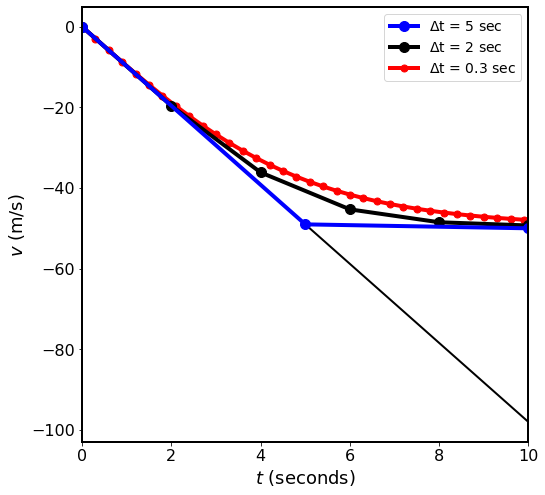

In [13]:
#now set up the problem
time = np.linspace(0, 10, 100)  #what does this command do? 
v_0 = 0.
g = 9.8

#compute and plot the analytic solution
velocity = v_0 - g*time
analytic, = plt.plot(time[:],velocity[:],linewidth = 2, color = 'black')
#plt.axis([1E-3,1.5,1E-2,2.5E3])
xlabel = plt.xlabel('$t$ (seconds)') 
ylabel = plt.ylabel('$v$ (m/s)')


model_time = 10.0

#run for timesteps of 0.3s
times_point3, velocities_point3 = model_velocities(v_0, g, model_time, 0.3)
delta_point3, = plt.plot(times_point3[:], velocities_point3[:], marker = 'o', color = 'red', markersize = 7, label='$\Delta$t = 0.3 sec')
analytic_point3 = v_0 - g*times_point3
residuals_point3 = analytic_point3 - velocities_point3

#run for timesteps of 2s
times_2, velocities_2 = model_velocities(v_0, g, model_time, 2.)
delta_2, = plt.plot(times_2[:], velocities_2[:], marker = 'o', color = 'black', markersize = 10, label='$\Delta$t = 2 sec')
analytic_two = v_0 - g*times_2
residuals_two = analytic_two - velocities_2

#run for timesteps of 5s
times_5, velocities_5 = model_velocities(v_0, g, model_time, 5.)
delta_5, = plt.plot(times_5[:], velocities_5[:], marker = 'o', color = 'blue', markersize = 10, label='$\Delta$t = 5 sec')
analytic_five = v_0 - g*times_5
residuals_five = analytic_five - velocities_5

plt.legend(handles=[analytic, delta_5, delta_2, delta_point3], loc=1)
plt.xlim(0,10)
plt.savefig('Euler_projectile_Figure1.png', bbox_inches='tight')

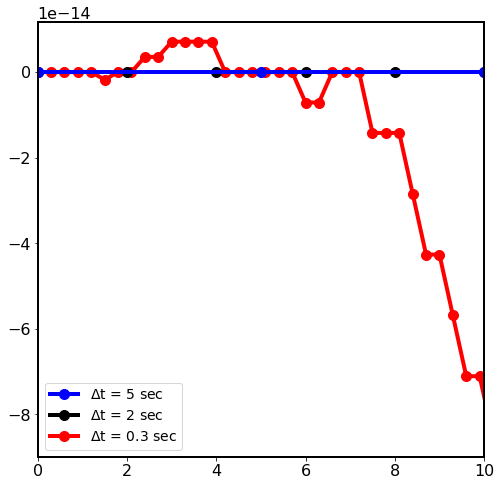

In [ ]:
show_residuals_point3, = plt.plot(times_point3[:], residuals_point3[:], marker = 'o', color = 'red', markersize = 10, label='$\Delta$t = 0.3 sec')
show_residuals_2, = plt.plot(times_2[:], residuals_two[:], marker = 'o', color = 'black', markersize = 10, label='$\Delta$t = 2 sec')
show_residuals_5, = plt.plot(times_5[:], residuals_five[:], marker = 'o', color = 'blue', markersize = 10, label='$\Delta$t = 5 sec')

plt.legend(handles=[show_residuals_5, show_residuals_2, show_residuals_point3], loc=3)
plt.xlim(0,10)
plt.savefig('HW0_projectile_residuals.png', bbox_inches='tight')


In [ ]:
print, residuals/analytic_point3

NameError: name 'residuals' is not defined